In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../Student_Performance.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


## Visualization of In-dependent with dependent variable

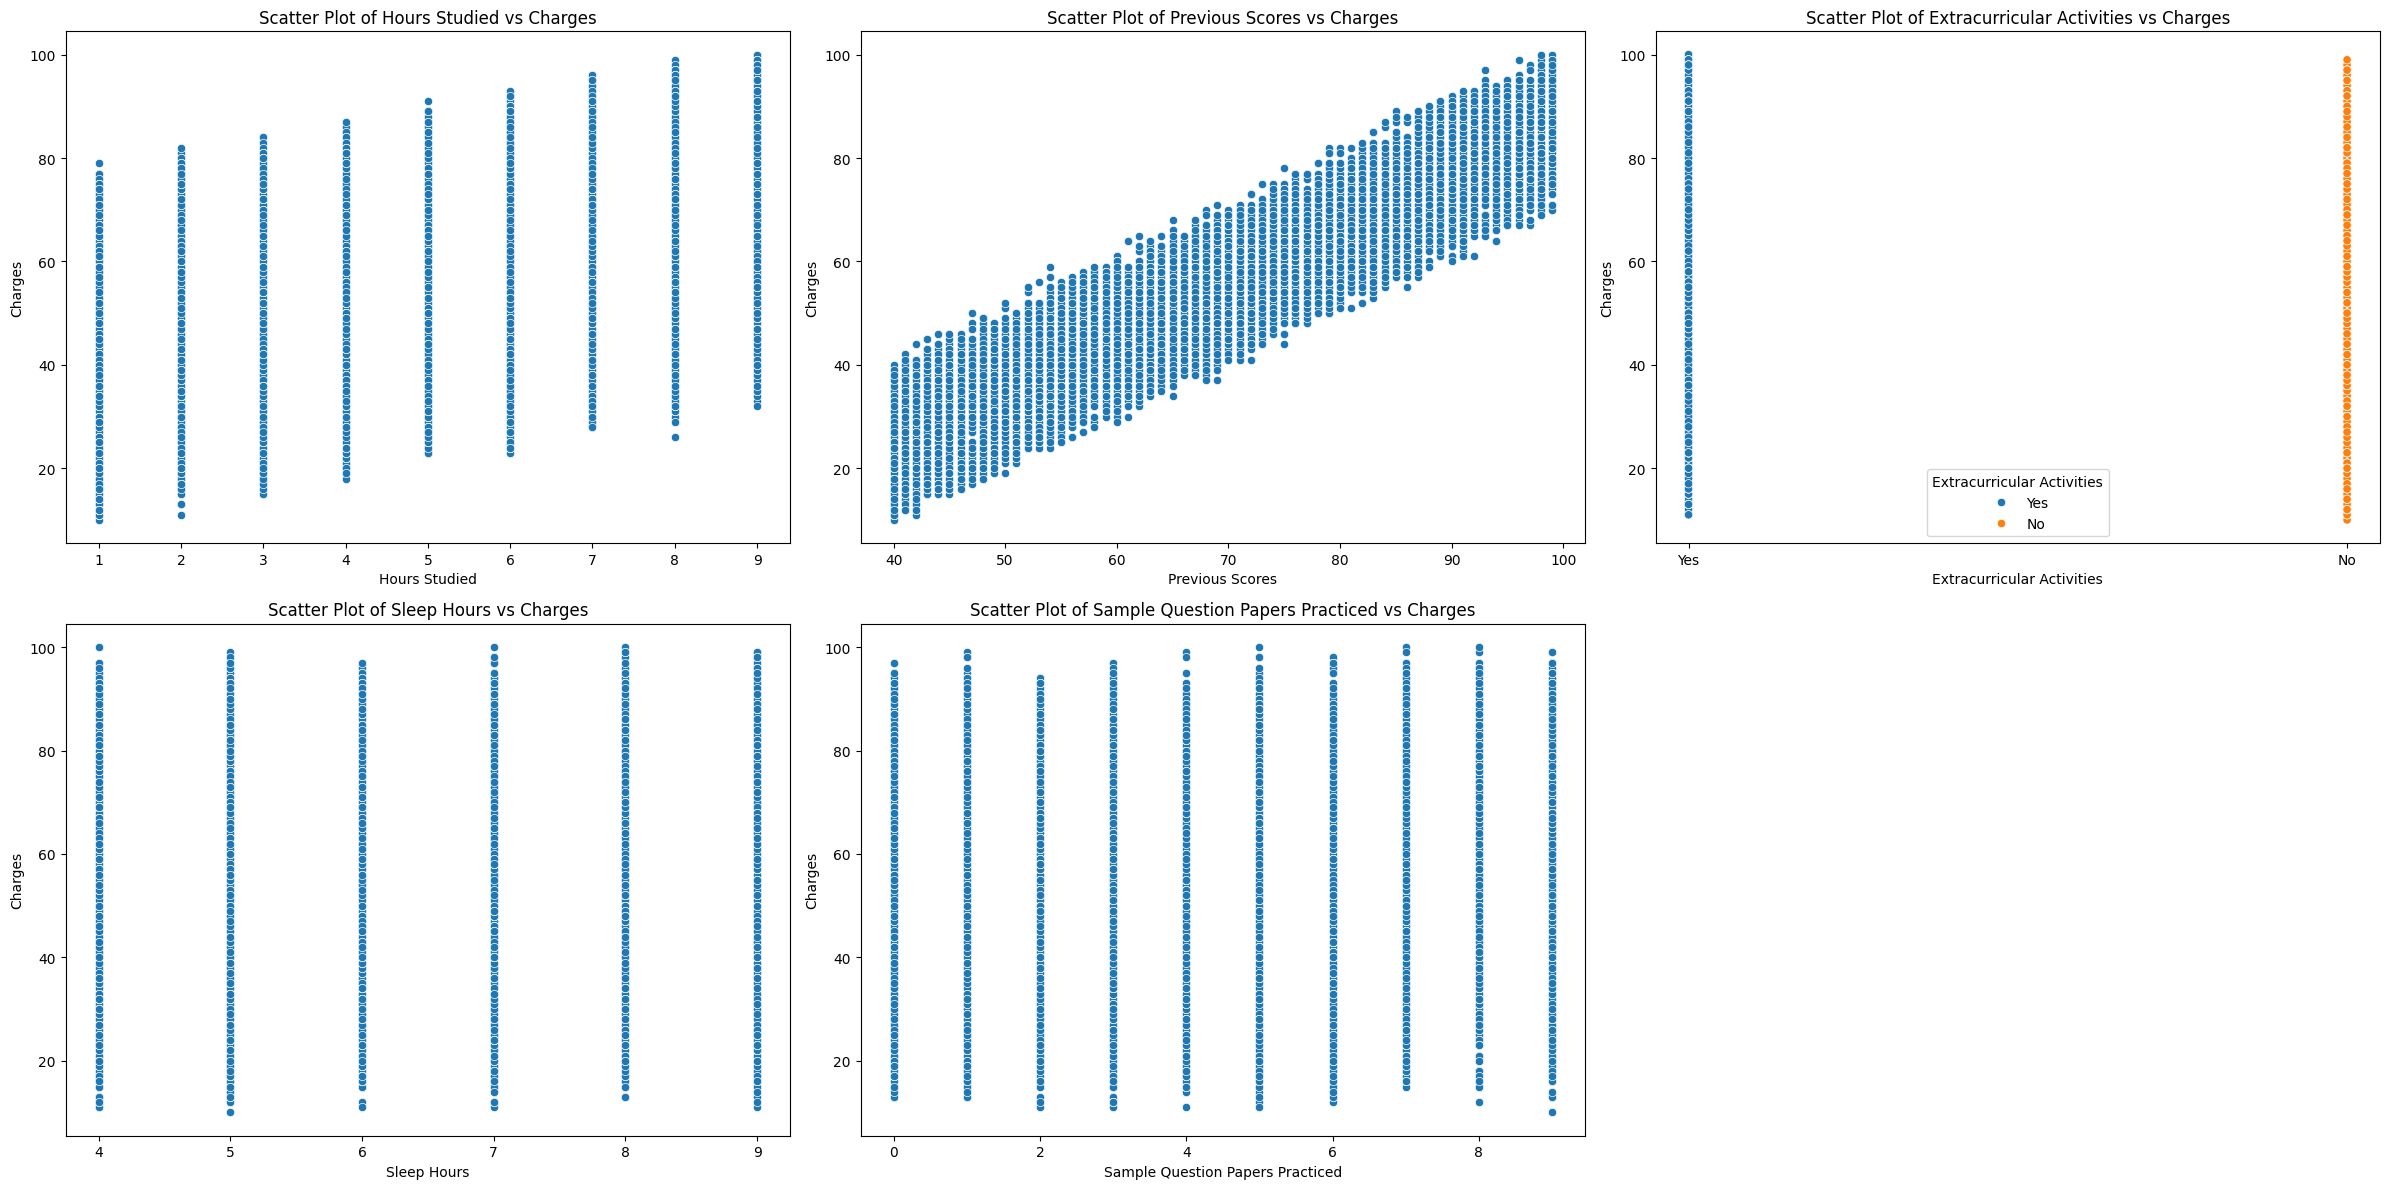

In [3]:
# for var in X.columns.tolist():
#     plt.figure(figsize=(8, 6))
#     if X[var].dtype == 'object':  # Check if the variable is categorical
#         sns.scatterplot(x=var, y=Y, data=df, hue=var)
#     else:
#         sns.scatterplot(x=X[var], y=Y)
#     plt.title(f'Scatter Plot of {var} vs Charges')
#     plt.xlabel(var)
#     plt.ylabel('Charges')
#     plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of columns and rows
num_cols = 3
num_plots = len(X.columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # This ensures enough rows

# Adjust the figsize to maintain the 8x6 size for each subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, var in enumerate(X.columns):
    ax = axes[i]
    if X[var].dtype == 'object':  # Check if the variable is categorical
        sns.scatterplot(x=var, y=Y, data=df, hue=var, ax=ax)
    else:
        sns.scatterplot(x=X[var], y=Y, ax=ax)
    ax.set_title(f'Scatter Plot of {var} vs Charges')
    ax.set_xlabel(var)
    ax.set_ylabel('Charges')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 2] = label_encoder.fit_transform(X.iloc[:, 2])
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize Neural Network
regressor = Sequential()

# Input layer
regressor.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim=5))

# Output layer (regression)
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train ANN
regressor.fit(X_train, Y_train, batch_size=10, epochs=100)

Epoch 1/100


/Users/vinuthna/ai project/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - loss: 3154.7029 - mse: 3154.7029
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 2062.3652 - mse: 2062.3652
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 938.4473 - mse: 938.4473  
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 321.7311 - mse: 321.7311
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 81.0312 - mse: 81.0312  
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 11.9481 - mse: 11.9481
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 4.7825 - mse: 4.7825
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 4.5600 - mse: 4.5600
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 4.4928 - mse: 4.4928
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 4.4295 - mse: 4.4295
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 4.3701 - mse: 4.3701
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - 

In [8]:
# Predicting the test set results
Y_pred = regressor.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


# Accuracy Check

In [9]:

# Evaluating the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute R-Squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-Squared (R2) score:", r2)

Mean Squared Error (MSE): 4.119034484925347
Mean Absolute Error (MAE): 1.6226196537017823
R-Squared (R2) score: 0.9880296257397255
